In [11]:
!pip install google
# Import all the necessary libraries

import pandas as pd
# from google.colab import drive
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Reading-in The Automobile Data

In [12]:
# Read the CSV file into a Pandas DataFrame from google drive
# drive.mount('/content/drive')
df = pd.read_csv('Automobile_data.csv')

# Display the first few rows of the DataFrame
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Adding Additional Records for Cadillac, Ford, Chrysler, GMC, and Kia.

In [14]:
# Create a dictionary with the additional records
additional_records = {
    'cadillac': [
        {'symboling': 0, 'normalized-losses': '?', 'make': 'cadillac', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'sedan', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 100.5, 'length': 196.7, 'width': 72.2, 'height': 55.9, 'curb-weight': 3715, 'engine-type': 'ohc', 'num-of-cylinders': 'six', 'engine-size': 222, 'fuel-system': 'mpfi', 'bore': 3.46, 'stroke': 3.1, 'compression-ratio': 8.1, 'horsepower': 155, 'peak-rpm': 4750, 'city-mpg': 16, 'highway-mpg': 25, 'price': '?'},
        {'symboling': -1, 'normalized-losses': '?', 'make': 'cadillac', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'wagon', 'drive-wheels': 'rwd', 'engine-location': 'front', 'wheel-base': 110.0, 'length': 190.9, 'width': 70.3, 'height': 56.5, 'curb-weight': 3515, 'engine-type': 'ohc', 'num-of-cylinders': 'six', 'engine-size': 207, 'fuel-system': '?', 'bore': 3.8, 'stroke': 3.1, 'compression-ratio': 8.1, 'horsepower': 160, 'peak-rpm': 4500, 'city-mpg': 15, 'highway-mpg': 24, 'price': '?'},
        {'symboling': 2, 'normalized-losses': '160', 'make': 'cadillac', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'two', 'body-style': 'convertible', 'drive-wheels': 'rwd', 'engine-location': 'front', 'wheel-base': 96.6, 'length': 159.3, 'width': 64.2, 'height': 50.8, 'curb-weight': 2800, 'engine-type': 'dohc', 'num-of-cylinders': 'four', 'engine-size': 130, 'fuel-system': 'mpfi', 'bore': '3.52', 'stroke': '2.64', 'compression-ratio': 9.0, 'horsepower': 90, 'peak-rpm': '5500', 'city-mpg': 30, 'highway-mpg': 34, 'price': '9250'}
    ],
    'ford': [
        {'symboling': 1, 'normalized-losses': '104', 'make': 'ford', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'sedan', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 105.8, 'length': 189.0, 'width': 66.9, 'height': 55.1, 'curb-weight': 2524, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '10345'},
        {'symboling': 0, 'normalized-losses': '?', 'make': 'ford', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'two', 'body-style': 'hatchback', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72.0, 'height': 54.3, 'curb-weight': 2155, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '8238'},
        {'symboling': 1, 'normalized-losses': '104', 'make': 'ford', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'wagon', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72.0, 'height': 54.3, 'curb-weight': 2425, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 122, 'fuel-system': 'mpfi', 'bore': '3.31', 'stroke': '3.54', 'compression-ratio': 8.70, 'horsepower': 88, 'peak-rpm': '5000', 'city-mpg': 25, 'highway-mpg': 30, 'price': '8921'}
    ],
    'chrysler': [
        {'symboling': 0, 'normalized-losses': '?', 'make': 'chrysler', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'sedan', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 105.8, 'length': 189.0, 'width': 66.9, 'height': 55.1, 'curb-weight': 2524, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '10345'},
        {'symboling': -1, 'normalized-losses': '?', 'make': 'chrysler', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'two', 'body-style': 'hatchback', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72.0, 'height': 54.3, 'curb-weight': 2155, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '8238'},
        {'symboling': 1, 'normalized-losses': '104', 'make': 'chrysler', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'wagon', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72.0, 'height': 54.3, 'curb-weight': 2425, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 122, 'fuel-system': 'mpfi', 'bore': '3.31', 'stroke': '3.54', 'compression-ratio': 8.70, 'horsepower': 88, 'peak-rpm': '5000', 'city-mpg': 25, 'highway-mpg': 30, 'price': '8921'}
    ],
    'gmc': [
        {'symboling': 0, 'normalized-losses': '?', 'make': 'gmc', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'sedan', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 105.8, 'length': 189.0, 'width': 66.9, 'height': 55.1, 'curb-weight': 2524, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '10345'},
        {'symboling': -1, 'normalized-losses': '?', 'make': 'gmc', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'two', 'body-style': 'hatchback', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72.0, 'height': 54.3, 'curb-weight': 2155, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 140, 'fuel-system': 'mpfi', 'bore': '3.00', 'stroke': '3.11', 'compression-ratio': 8.50, 'horsepower': 114, 'peak-rpm': '5400', 'city-mpg': 23, 'highway-mpg': 28, 'price': '8238'},
        {'symboling': 1, 'normalized-losses': '104', 'make': 'gmc', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'wagon', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 98.4, 'length': 175.7, 'width': 72}
        ],
    'kia': [
    {'symboling': 0, 'normalized-losses': '?', 'make': 'kia', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'sedan', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 100.4, 'length': 180.2, 'width': 66.9, 'height': 55.1, 'curb-weight': 2823, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 122, 'fuel-system': 'mpfi', 'bore': '3.31', 'stroke': '3.54', 'compression-ratio': 8.70, 'horsepower': 88, 'peak-rpm': '5000', 'city-mpg': 25, 'highway-mpg': 31, 'price': '7975'},
    {'symboling': 1, 'normalized-losses': '?', 'make': 'kia', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'four', 'body-style': 'wagon', 'drive-wheels': 'fwd', 'engine-location': 'front', 'wheel-base': 102.4, 'length': 187.8, 'width': 66.5, 'height': 55.5, 'curb-weight': 2935, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 122, 'fuel-system': 'mpfi', 'bore': '3.31', 'stroke': '3.54', 'compression-ratio': 9.00, 'horsepower': 88, 'peak-rpm': '5000', 'city-mpg': 24, 'highway-mpg': 29, 'price': '8189'},
    {'symboling': 2, 'normalized-losses': '102', 'make': 'kia', 'fuel-type': 'gas', 'aspiration': 'std', 'num-of-doors': 'two', 'body-style': 'hatchback', 'drive-wheels': 'rwd', 'engine-location': 'front', 'wheel-base': 95.3, 'length': 169.0, 'width': 65.7, 'height': 49.6, 'curb-weight': 2380, 'engine-type': 'ohc', 'num-of-cylinders': 'four', 'engine-size': 122, 'fuel-system': 'mpfi', 'bore': '3.31', 'stroke': '3.54', 'compression-ratio': 9.00, 'horsepower': 88, 'peak-rpm': '5000', 'city-mpg': 26, 'highway-mpg': 31, 'price': '9295'}
]

}

# Create a new dataframe with the additional records
df_additional = pd.DataFrame()
for make in additional_records:
    df_make = pd.DataFrame(additional_records[make])
    df_additional = pd.concat([df_additional, df_make], ignore_index=True)

# Concatenate the original dataframe with the new dataframe
df = pd.concat([df, df_additional], ignore_index=True)

# Save the updated dataframe to a new CSV file
df.to_csv('updated_automobile_data.csv')

# Exploring The Data

In [15]:
# check again to see the first and last few rows of the updated data
# first 3 rows
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500


In [16]:
#last 3 rows
df.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
232,0,?,kia,gas,std,four,sedan,fwd,front,100.4,...,122.0,mpfi,3.31,3.54,8.7,88.0,5000,25.0,31.0,7975
233,1,?,kia,gas,std,four,wagon,fwd,front,102.4,...,122.0,mpfi,3.31,3.54,9.0,88.0,5000,24.0,29.0,8189
234,2,102,kia,gas,std,two,hatchback,rwd,front,95.3,...,122.0,mpfi,3.31,3.54,9.0,88.0,5000,26.0,31.0,9295


In [17]:
# Explore the summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
df.describe()


Summary statistics of numerical columns:


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,235.000000,235.000000,235.000000,235.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,0.778723,99.025957,174.852340,66.332340,53.793991,2566.527897,128.901288,9.956309,24.969957,30.506438
std,1.220364,5.848366,12.196182,2.509873,2.383195,514.683624,40.793040,3.759946,6.298874,6.545017
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.800000,167.500000,64.200000,52.000000,2169.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,97.300000,174.600000,65.700000,54.300000,2425.000000,122.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,185.600000,67.200000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [18]:
# Check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          235 non-null    int64  
 1   normalized-losses  235 non-null    object 
 2   make               235 non-null    object 
 3   fuel-type          235 non-null    object 
 4   aspiration         235 non-null    object 
 5   num-of-doors       235 non-null    object 
 6   body-style         235 non-null    object 
 7   drive-wheels       235 non-null    object 
 8   engine-location    235 non-null    object 
 9   wheel-base         235 non-null    float64
 10  length             235 non-null    float64
 11  width              235 non-null    float64
 12  height             233 non-null    float64
 13  curb-weight        233 non-null    float64
 14  engine-type        233 non-null    object 
 15  num-of-cylinders   233 non-null    object 
 16  engine-size        233 non

## Data Wrangling

In [19]:
#Replacing the "?" values with NaN
df.replace("?",np.NaN, inplace=True)

In [20]:
#Find out if there are null fields
df.isnull().sum()

symboling             0
normalized-losses    59
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                2
curb-weight           2
engine-type           2
num-of-cylinders      2
engine-size           2
fuel-system           4
bore                  6
stroke                6
compression-ratio     2
horsepower            4
peak-rpm              4
city-mpg              2
highway-mpg           2
price                10
dtype: int64

**Handling all the missing data**

In [21]:
# delete all row where price is missing
df.dropna(subset = ["price"], inplace = True, axis = 0)
## reset index
df.reset_index(drop=True, inplace=True)

In [22]:
#replace null normalized losses with mean
average_normalized_loss = df["normalized-losses"].astype("float").mean()
df["normalized-losses"].replace(np.nan, average_normalized_loss, inplace = True)

In [23]:
#replace null stroke values with mean
average_stroke = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, average_stroke, inplace = True)

In [24]:
#replace null bore values with the mean
average_bore = df["bore"].astype("float").mean(axis = 0)
df["bore"].replace(np.nan, average_bore, inplace=True)

In [25]:
#replacing null horsepower values with mean
average_horsepower = df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan, average_horsepower, inplace= True)

In [26]:
#replacing null peak-rpm values with mean
average_horsepower = df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.nan, average_horsepower, inplace= True)

In [27]:
#replace null num-of-doors values with most frequent
most_frequent_numofdoor = df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, most_frequent_numofdoor, inplace=True)

In [28]:
#Now check whether there are any more null values
df.isnull().sum().sum()

0

# `Data Formatting`

In [29]:
#list data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object

In [30]:
# convert the data types to correct formats
df[['bore','stroke','price', 'peak-rpm', 'horsepower']] = df[['bore','stroke','price', 'peak-rpm', 'horsepower']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')

# check converted data types
df.dtypes


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

# Standardizing Data

In [31]:
# Strandardize the fuel consumption (city-mpg) from mpg to l/100km
df["city-L/100km"] = 235/df["city-mpg"]

In [32]:
#standardize highway-mpg to highway-l/100km
df["highway-L/100km"] = 253/df['highway-mpg']

# Normalizing Data

In [33]:
# normalize width,height and length
df["length"] = df["length"]/df["length"].max()
df["height"] = df["height"]/df["height"].max()
df["width"] = df["width"]/df["width"].max()


# Data Binning

Text(0.5, 1.0, 'Horsepower distribution')

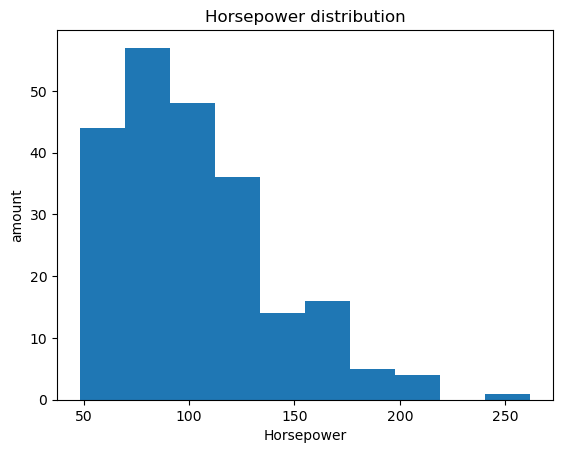

In [34]:
# first visualize horsepower distribution
plt.hist(df["horsepower"])

plt.xlabel("Horsepower")
plt.ylabel("amount")
plt.title("Horsepower distribution")

In [35]:
# construct the bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [36]:
#set the group names
group_names = ["low","medium","high"]

In [37]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(5)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low


In [38]:
# check number of vehicles in each bin
df["horsepower-binned"].value_counts()

low       177
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'Bin vizualization')

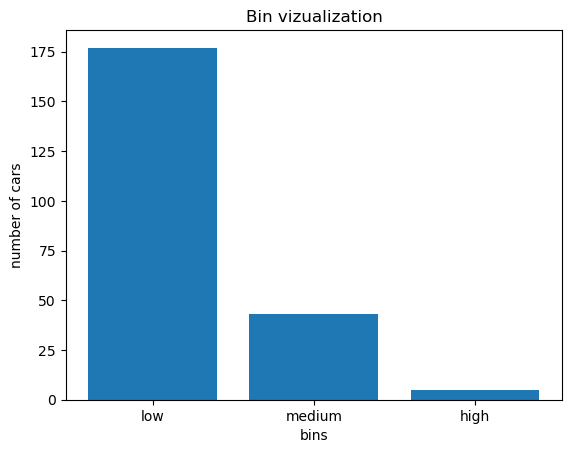

In [39]:
# plot the distribution of each bin
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("bins")
plt.ylabel("number of cars")
plt.title("Bin vizualization")

## Create Dummy Variables

In [40]:
# recheck the column names
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [41]:
# create dummies for fuel-type
dummy_var = pd.get_dummies(df["fuel-type"])
dummy_var.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
# rename the respective columns
dummy_var.rename(columns={"gas":"fuel-type-gas", "diesel":"fuel-type-diesel"}, inplace=True)
dummy_var.head(5)

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
# merge data frame and "dummy_var"
df = pd.concat([df, dummy_var], axis= 1)

#drop initial fuel-type from data
df.drop(labels="fuel-type", inplace=True, axis=1)

# Feature Engineering

In [44]:
# create a new 'Car Size' Feature'
df['Car Size'] = df['length'] * df['width'] * df['height']
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21.0,27.0,13495.0,11.190476,9.370370,low,0,1,0.589311
1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21.0,27.0,16500.0,11.190476,9.370370,low,0,1,0.589311
2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19.0,26.0,16500.0,12.368421,9.730769,medium,0,1,0.655799
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24.0,30.0,13950.0,9.791667,8.433333,low,0,1,0.708505
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18.0,22.0,17450.0,13.055556,11.500000,low,0,1,0.710645


In [46]:
# saving the cleaned dataframe
df.to_csv('cleaned_automobile.csv')

## Data Visualization

**Univariate Analysis**

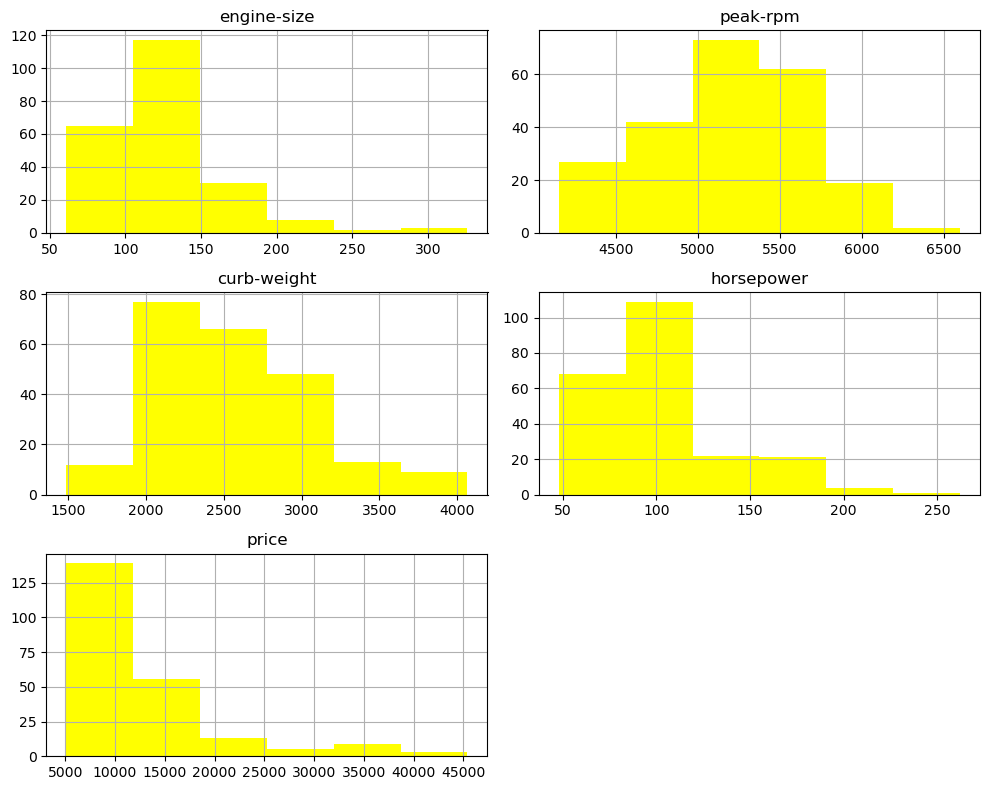

In [47]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='Yellow')
plt.tight_layout()
plt.show()

Observations:
Most of the car has a Curb Weight is in range 1900 to 3100,
The Engine Size is in range 60 to 190,
Most vehicle have horsepower 50 to 125,
Most Vehicle are in price range 5000 to 18000 and
peak rpm is mostly distributed between 4600 to 5700

Text(0.5, 0, 'engine-type')

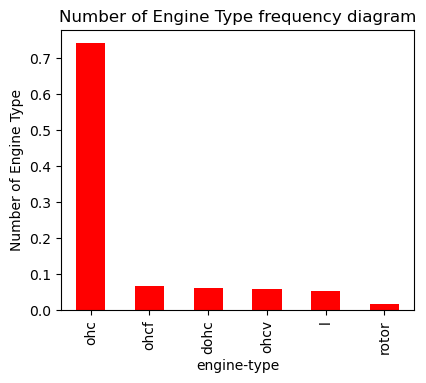

In [48]:
plt.figure(1)
plt.subplot(221)
df['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type')

More than 70 % of the vehicle has Ohc type of Engine

Text(0.5, 0, 'num-of-doors')

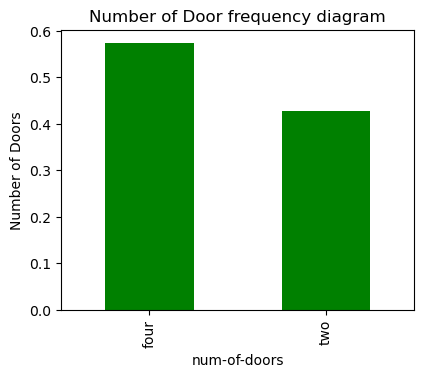

In [49]:
plt.subplot(222)
df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='green')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num-of-doors')

most cars have 4 doors

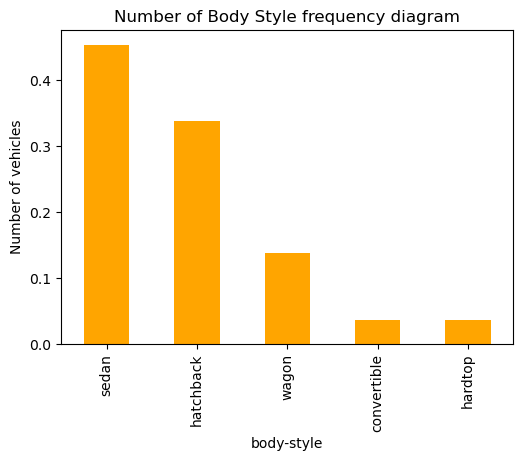

In [50]:
plt.subplot(224)
df['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

Most produced vehicle are of body style sedan around followed by hatchback

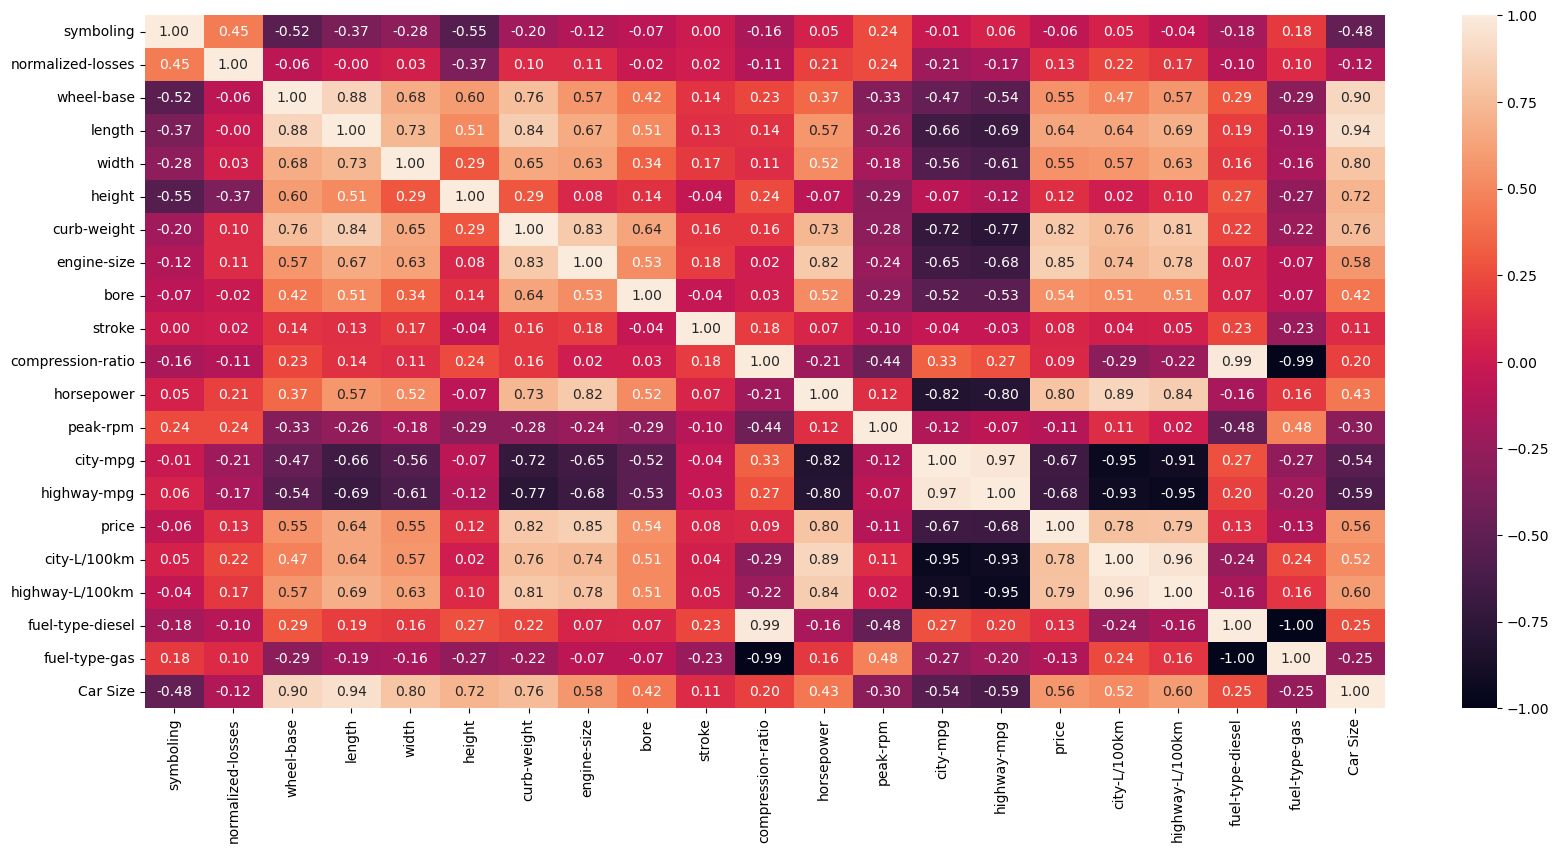

In [51]:
corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

curb-size, engine-size, horsepower are positively corelated,
city-mpg,highway-mpg are negatively corelated

**Bivariate Analysis**

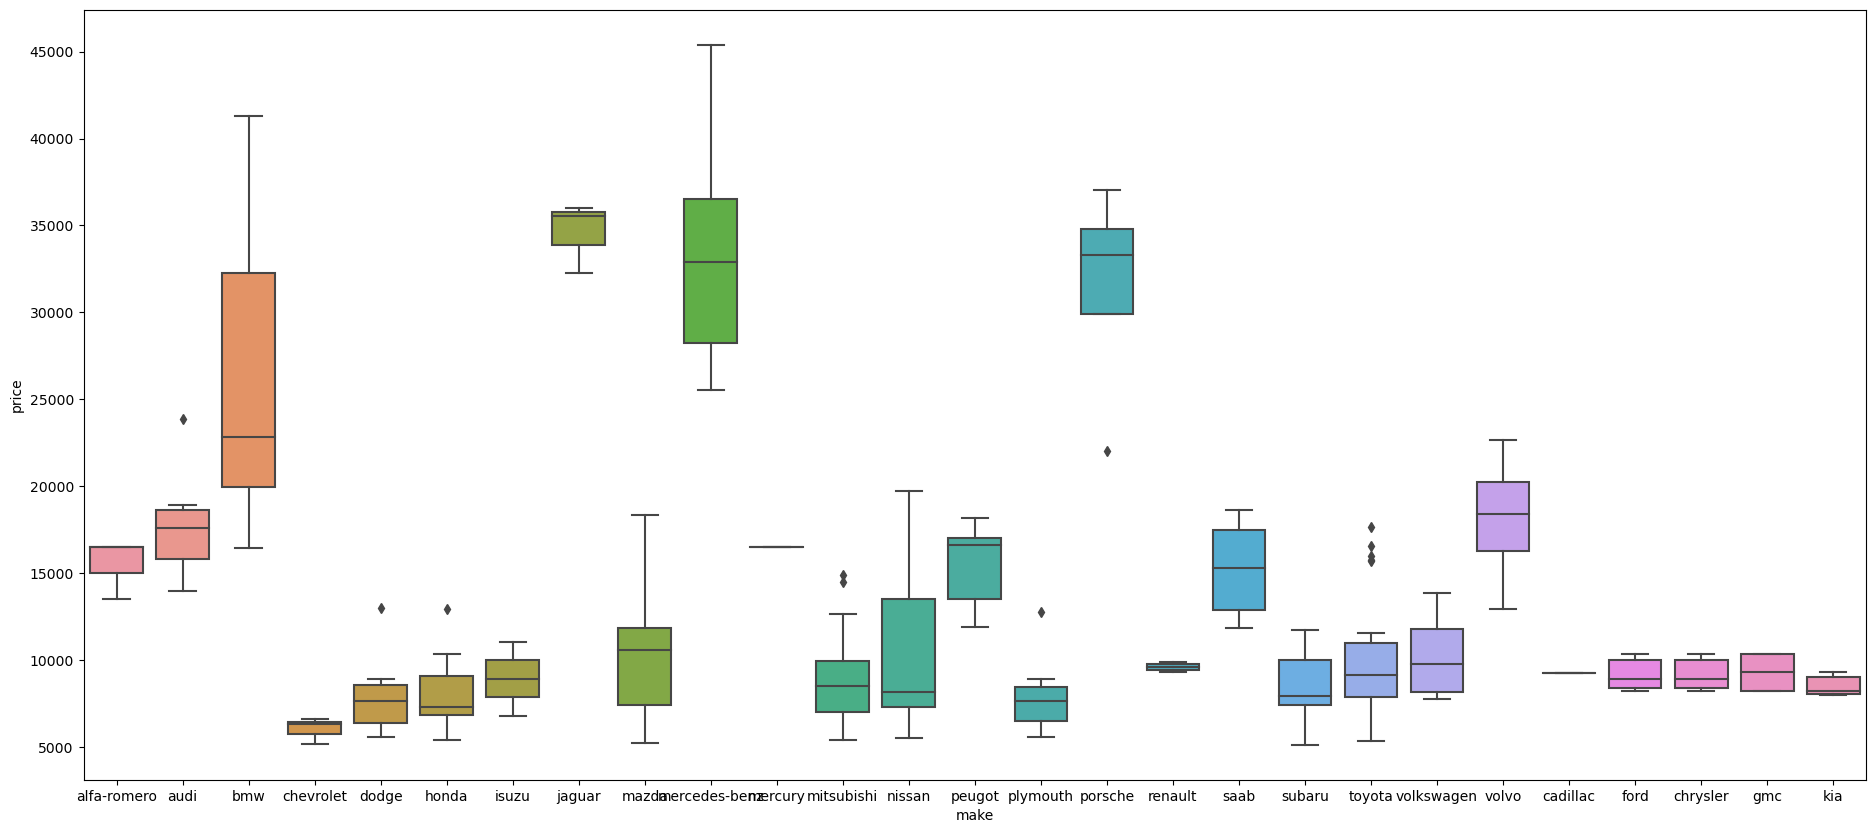

In [52]:
# Price Analysis

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

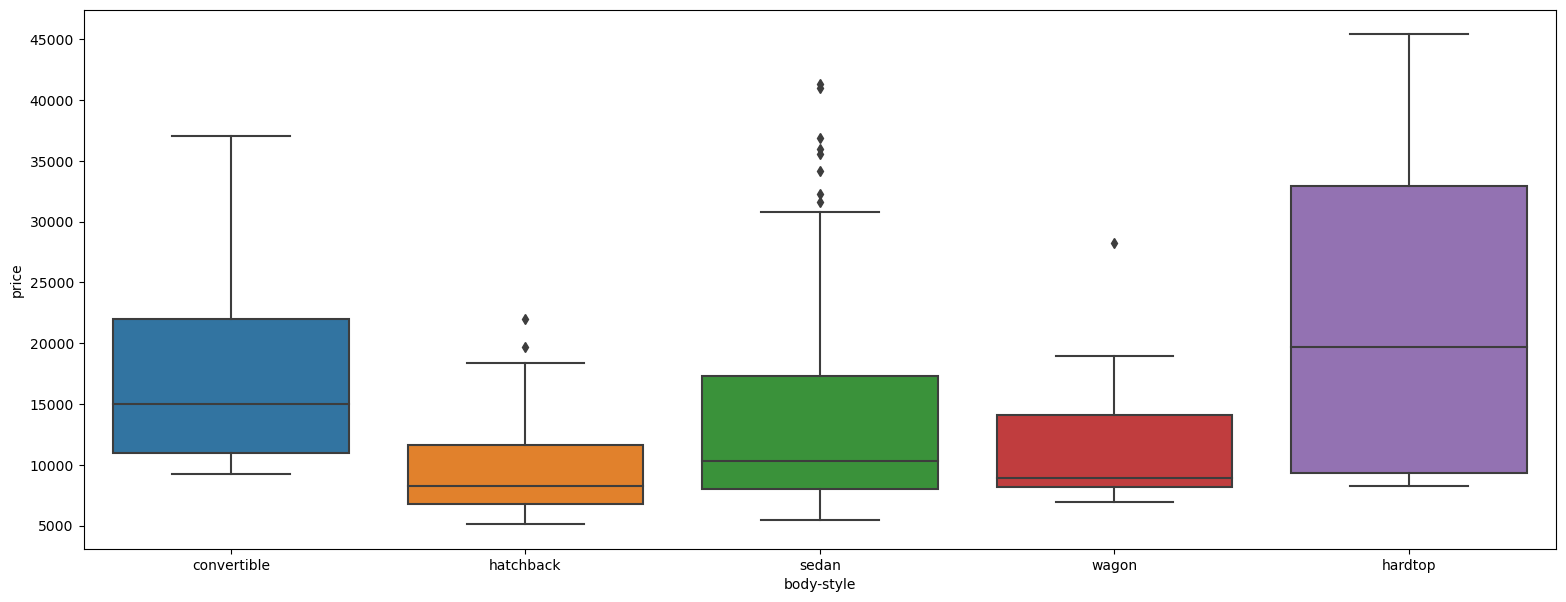

In [53]:
plt.rcParams['figure.figsize']=(19,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

/home/j/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


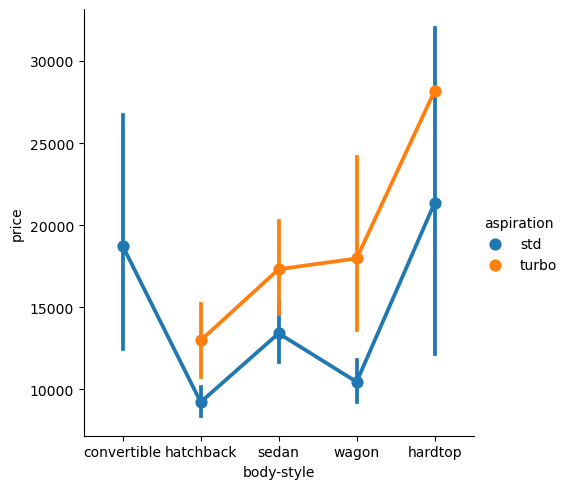

In [54]:
sns.catplot(data=df, x="body-style", y="price", hue="aspiration" ,kind="point")

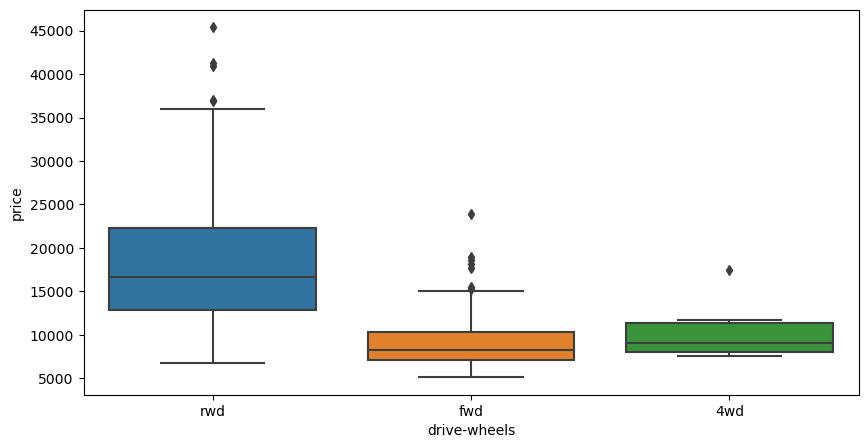

In [55]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

Observations

*   Mercedez-Benz ,BMW, Jaguar, Porshe produces most expensive cars

*   cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices

*   most of the cars comapany produces car in range below 25000

*   Turbo models have higher prices than for the standard model

*   rwd wheel drive vehicle have expensive prices











In [ ]:
g = sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "num-of-cylinders"]], hue="num-of-cylinders", diag_kind="hist")

Observations:

Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight.
As horsepower increase the engine size increases.
Curbweight also increases with the increase in Engine Size


For price,
engine size and curb-weight are positively correalted with price while
city-mpg is negatively corelated with price as increase horsepower